# **THÔNG TIN NHÓM**
## Tên nhóm: Một Hai Ba
## Thành viên:
- Diệp Hải Bình - 1712291
- Trần Văn Điệp - 1712343
- Vương Gia Bảo - 18120009
- Nguyễn Văn Minh - 18120464
- Hứa Phú Thành - 18120563

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime
import time

In [ ]:
df = pd.read_csv('https://datamillnorth.org/download/road-traffic-accidents/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv')
df

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,6
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,9
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,39
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,5
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,6CU0181,442094,434619,1,30/12/2019,422,1,M1,2,4,4,E08000035,1,9,1,3,1,27
1903,6CU0363,423019,437653,1,30/12/2019,1000,3,A65,4,1,1,E08000035,1,5,1,2,1,36
1904,6CV0723,436853,442515,2,31/12/2019,1340,3,A58,1,1,1,E08000035,2,1,1,2,1,59
1905,6CV1518,421466,433999,3,31/12/2019,1640,3,A647,1,4,1,E08000035,2,9,1,3,1,41


# **KHU VỰC XẢY RA TAI NẠN NHIỀU NHẤT VÀ NGUYÊN NHÂN (Thành)**

## KHU VỰC XẢY RA TAI NẠN NHIỀU NHẤT

- Mỗi cặp giá trị "Easting" và "Northing" là một tọa độ khu vực xảy ra tai nạn được tham chiếu lưới.
- Tạo dataframe đếm số lần xảy ra tai nạn ở mỗi tọa độ.

In [ ]:
df_coord = pd.DataFrame(df.groupby(['Grid Ref: Easting', 'Grid Ref: Northing'])['Reference Number'].count().sort_values())
df_coord.columns=['Times']
df_coord

,,Times
Grid Ref: Easting,Grid Ref: Northing,
414747,442825,1
430816,435056,1
430814,433937,1
430811,433259,1
430807,435341,1
...,...,...
436147,434957,7
430787,433346,7
440976,447851,9


- Khu vực xảy ra tai nạn nhiều nhất: Vị trí tọa độ có **(430846, 434032)**, với **13 lần**.

In [ ]:
df_top = df_coord[df_coord.Times==df_coord.Times.max()]
df_top

,,Times
Grid Ref: Easting,Grid Ref: Northing,
430846,434032,13


## NGUYÊN NHÂN

### ĐIỀU KIỆN THỜI TIẾT

In [ ]:
df_top=df_top.reset_index()
top = df[df['Grid Ref: Easting'].isin(df_top['Grid Ref: Easting']) & df['Grid Ref: Northing'].isin(df_top['Grid Ref: Northing'])]

In [ ]:
weather = pd.DataFrame(top.groupby(['Grid Ref: Easting', 'Grid Ref: Northing'])['Weather Conditions'].value_counts())
weather.columns=['Times']
weather

,,,Times
Grid Ref: Easting,Grid Ref: Northing,Weather Conditions,
430846,434032,2,13


##**KẾT LUẬN 1**
- Có thể thấy tại tọa độ **(430846, 434032)** cả 13 trường hợp tai nạn (100%) đều có thời tiết là **2** - tức là **mưa** và **không có gió mạnh**
<br> => Do **mưa** làm đường **trơn trượt** đã gây ra tai nạn.
- Không xét đến **Lightning Conditions** vì tất cả trường hợp đều là 1 tức là **ban ngày** và **có đèn đường** (ánh sáng đầy đủ).

### ĐIỀU KIỆN MẶT ĐƯỜNG

In [ ]:
surface = pd.DataFrame(top.groupby(['Grid Ref: Easting', 'Grid Ref: Northing'])['Road Surface'].value_counts())
surface.columns=['Times']
surface

,,,Times
Grid Ref: Easting,Grid Ref: Northing,Road Surface,
430846,434032,2,13


##**KẾT LUẬN 2**
- Cả 13 trường hợp tai nạn (100%) đều có điều kiện mặt đường lúc đó là **2** - tức là **ẩm ướt**


# **SO SÁNH CÁCH CÁC KHU VỰC ĐỐI PHÓ VỚI TAI NẠN GIAO THÔNG (Bảo)**

## TÌNH HÌNH TAI NẠN GIAO THÔNG TRÊN TOÀN KHU VỰC NĂM 2019

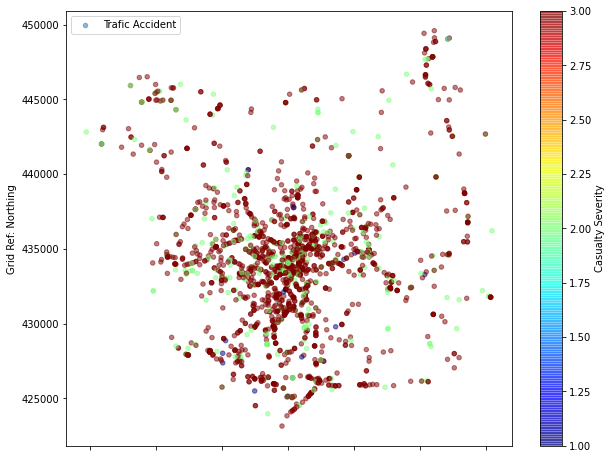

In [ ]:
df.plot(
    kind="scatter",
    x="Grid Ref: Easting",
    y="Grid Ref: Northing",
    alpha=0.5,
    label="Trafic Accident",
    figsize=(10, 8),
    c="Casualty Severity",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.legend()

**NHẬN XÉT**
* Tai nạn giao thông xảy ra thường xuyên ở khu vực trung tâm
* Tuy nhiên, các tai nạn gây tử vong (màu xanh lam) lại xảy ra nhiều hơn ở phía Nam

Để hiểu rõ hơn, ta sẽ quan sát sự thay đổi tình hình tai nạn theo thời gian

## PHÂN TÍCH THEO QUÝ

In [ ]:
# Thêm cột tháng vào trong dữ liệu
df["Accident Month"] = df["Accident Date"].apply(lambda x: x[3:10])
df

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Accident Month
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,6,08/2019
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,9,08/2019
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,39,08/2019
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,5,08/2019
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,8,08/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,6CU0181,442094,434619,1,30/12/2019,422,1,M1,2,4,4,E08000035,1,9,1,3,1,27,12/2019
1903,6CU0363,423019,437653,1,30/12/2019,1000,3,A65,4,1,1,E08000035,1,5,1,2,1,36,12/2019
1904,6CV0723,436853,442515,2,31/12/2019,1340,3,A58,1,1,1,E08000035,2,1,1,2,1,59,12/2019
1905,6CV1518,421466,433999,3,31/12/2019,1640,3,A647,1,4,1,E08000035,2,9,1,3,1,41,12/2019


In [ ]:
# Kiểm tra lại xem cột tháng có những phần tử gì
month = df["Accident Month"].unique()
month

array(['08/2019', '01/2019', '02/2019', '03/2019', '12/2019', '04/2019',
       '05/2019', '10/2019', '06/2019', '07/2019', '09/2019', '11/2019'],
      dtype=object)

In [ ]:
# Phân chia dữ liệu thành các phần, mỗi phần tương đương với một tháng
month_df = {}
for i in range(1,10):
    month_df[i] = df[df['Accident Month']==f'0{i}/2019']
for i in range(10,13):
    month_df[i] = df[df['Accident Month']==f'{i}/2019']

In [ ]:
# Gom dữ liệu lại thành 4 phần, mỗi phần tương đương với 3 tháng
three_month_df = {}
for i in range(1,13,3):
    three_month_df[i] = pd.concat([month_df[i], month_df[i+1], month_df[i+2]])

[Text(0.5, 1.0, '10-12')]

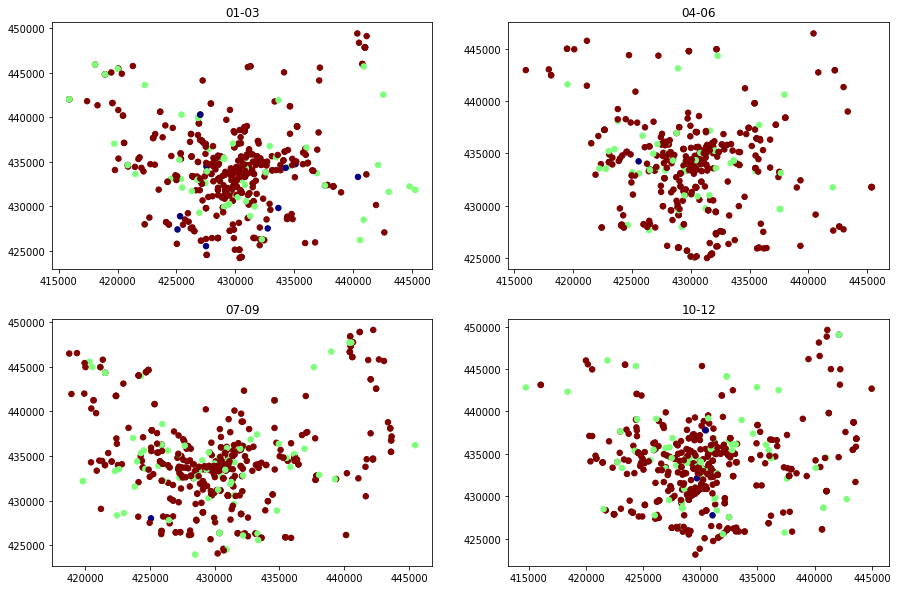

In [ ]:
fig, ((a1,a4),(a7,a10)) = plt.subplots(2,2, figsize = (15,10))

x_label = "Grid Ref: Easting"
y_label = "Grid Ref: Northing"

# 1 - 3
a1.scatter(
    three_month_df[1][x_label],
    three_month_df[1][y_label],
    s=30,
    c = three_month_df[1]["Casualty Severity"],
    cmap=plt.get_cmap("jet")
)
a1.set(title = '01-03')

# 4 - 6 
a4.scatter(
    three_month_df[4][x_label],
    three_month_df[4][y_label],
    s=30,
    c = three_month_df[4]["Casualty Severity"],
    cmap=plt.get_cmap("jet")
)
a4.set(title = '04-06')

# 7 - 9
a7.scatter(
    three_month_df[7][x_label],
    three_month_df[7][y_label],
    s=30,
    c = three_month_df[7]["Casualty Severity"],
    cmap=plt.get_cmap("jet")
)
a7.set(title = '07-09')

# 10 - 12
a10.scatter(
    three_month_df[10][x_label],
    three_month_df[10][y_label],
    s=30,
    c = three_month_df[10]["Casualty Severity"],
    cmap=plt.get_cmap("jet")
)
a10.set(title = '10-12')

##**KẾT LUẬN**
* Trong khoảng thời gian từ **tháng 1 đến tháng 3** tai nạn xảy ra rất thường xuyên, đặc biệt là có rất nhiều trường hợp gây tử vong xảy ra ở những vùng lân cận trung tâm.
* Trong khoảng thời gian từ **tháng 4 đến tháng 6**, tình hình tai nạn giảm đi đáng kể so với 3 tháng trước, số trường hợp tử vong cũng chỉ còn lại một ca. Khu vực phía Đông Nam và Tây Bắc có số trường hợp tai nạn nghiêm trọng (màu xanh lục) cũng giảm đi khá nhiều so với thời gian trước.
* Trong khoảng thời gian từ **tháng 7 đến tháng 9**. Tai nạn xảy ra ở hướng Đông Nam giảm đi. Tuy nhiên, tai nạn lại xảy ra nhiều hơn ở hướng Tây Bắc và Đông Bắc và các con đường đi vào trung tâm. Ở hướng Nam có nhiều nhiều trường hợp tại nạn nghiêm trọng hơn và có trường hợp tử vong.
* Trong khoảng thời gian **cuối năm**. Tai nạn xảy ra ở khu vực phía Tây giảm đi hẳn. Nhưng ở trung tâm lại xảy ra nhiều hơn, trường hợp tử vong cũng tăng lên.

# **LOẠI HÌNH TAI NẠN GIAO THÔNG NÀO GÂY TỔN THẤT NẶNG NỀ NHẤT (Minh)**

## KIỂM TRA KIỂU DỮ LIỆU VÀ XEM CÓ DỮ LIỆU TRỐNG NÀO KHÔNG

In [ ]:
df.dtypes

Reference Number       object
Grid Ref: Easting       int64
Grid Ref: Northing      int64
Number of Vehicles      int64
Accident Date          object
Time (24hr)             int64
1st Road Class          int64
1st Road Class & No    object
Road Surface            int64
Lighting Conditions     int64
Weather Conditions      int64
Local Authority        object
Vehicle Number          int64
Type of Vehicle         int64
Casualty Class          int64
Casualty Severity       int64
Sex of Casualty         int64
Age of Casualty         int64
Accident Month         object
dtype: object

In [ ]:
sum(df['Type of Vehicle'].isnull())

0

## THỐNG KÊ SỐ NGƯỜI BỊ ẢNH HƯỞNG CỦA TAI NẠN THEO LOẠI PHƯƠNG TIỆN

### THỐNG KÊ THEO MỨC ĐỘ CHẤN THƯƠNG CỦA TỪNG LOẠI PHƯƠNG TIỆN GÂY RA

In [ ]:
df['Casualty Severity'].unique()

array([3, 2, 1])

In [ ]:
df2 = df[['Type of Vehicle','Casualty Severity']]
df2.value_counts()

Type of Vehicle  Casualty Severity
9                3                    1110
1                3                     173
9                2                     173
19               3                      62
1                2                      61
11               3                      53
8                3                      53
3                3                      41
                 2                      31
5                2                      22
                 3                      16
2                3                      14
11               2                      12
9                1                      12
19               2                      10
4                3                       9
                 2                       8
8                2                       7
21               3                       6
3                1                       5
20               3                       4
10               3                       4
2                2 

#### GÂY TỬ VONG

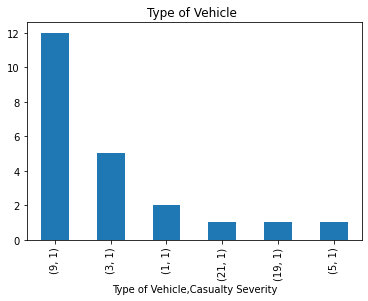

In [ ]:
df2[df2['Casualty Severity']==1].value_counts().plot(kind= 'bar', title = 'Type of Vehicle ')

#### CHẤN THƯƠNG NGHIÊM TRỌNG

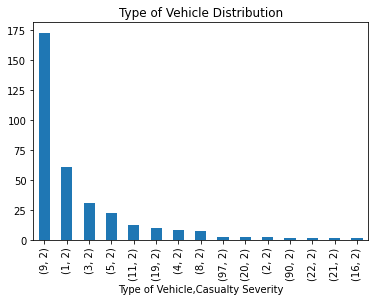

In [ ]:
df2[df2['Casualty Severity']==2].value_counts().plot(kind= 'bar', title = 'Type of Vehicle Distribution')

#### CHẤN THƯƠNG NHẸ

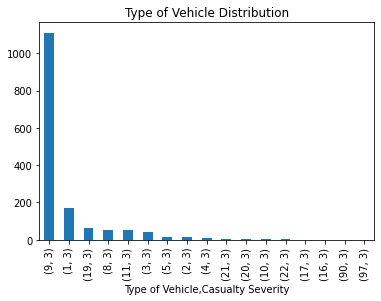

In [ ]:
df2[df2['Casualty Severity']==3].value_counts().plot(kind= 'bar', title = 'Type of Vehicle Distribution')

**NHẬN XÉT**: Loại hình gây chấn thương và tử vong nhiều nhất là **loại hình 9**.

### THỐNG KÊ TỔNG SỐ VỤ TAI NẠN THEO LOẠI PHƯƠNG TIỆN GÂY RA

In [ ]:
df2

,Type of Vehicle,Casualty Severity
0,11,3
1,11,3
2,11,3
3,11,3
4,11,3
...,...,...
1902,9,3
1903,5,2
1904,1,2
1905,9,3


In [ ]:
df_TOV=df2['Type of Vehicle'].value_counts()
df_TOV=pd.DataFrame(df_TOV)
df_TOV=df_TOV.reset_index()
df_TOV.rename(columns={'Type of Vehicle':'Total'}, inplace=True)
df_TOV.rename(columns={'index':'Type of Vehicle'}, inplace=True)
df_TOV

,Type of Vehicle,Total
0,9,1295
1,1,236
2,3,77
3,19,73
4,11,65
5,8,60
6,5,39
7,4,17
8,2,16
9,21,8


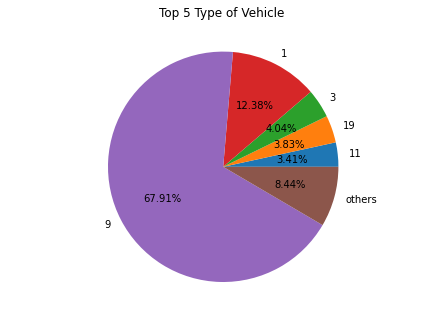

In [ ]:
top5_df= df_TOV.nlargest(5,['Total'])[['Type of Vehicle', 'Total']].sort_values(by=["Total"])
new_row=pd.DataFrame(data = {
    'Type of Vehicle' : ['others'],
    'Total' : [df_TOV['Total'][5:].sum()]
})
df2 = pd.concat([top5_df, new_row])
df2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(df2['Total'], labels = df2['Type of Vehicle'],autopct='%1.2f%%')
ax.set_title('Top 5 Type of Vehicle ')
plt.show()

**NHẬN XÉT:** loại hình gây tai nạn giao thông nhiều nhất là **loại hình 9** (tức là **Car**) chiếm hơn 2/3 trên tổng số vụ.

##**KẾT LUẬN:**
- **Loại hình 9** là loại hình gây ra tai nạn nhiều nhất, chiếm hơn 2/3 tổng số vụ tai nạn trong cả năm.
- Ngoài ra, **loại hình 1** cũng gây ra tai nạn tương đối nhiều, chiếm 12% tổng số vụ.
- Nhìn chung, người sử dụng **loại hình 1** và **loại hình 9** là cần phải cẩn thận vì 2 loại đó là nguyên nhân chính của hầu hết các vụ tai nạn.

# **LOẠI PHƯƠNG TIỆN THƯỜNG XUYÊN GÂY TAI NẠN NHẤT (Điệp)**

In [ ]:
data = df.drop_duplicates()

## TIỀN XỬ LÝ
Bởi vì mỗi mẫu trong tập dữ liệu này là một record chỉ cho một người trong một vụ tai nạn nhất định.  Tuy nhiên, chúng ta phải tìm số lần mỗi loại phương tiện xảy ra tai nạn. Để xác định một record duy nhất cho một loại phương tiện tương ứng với **số phương tiện** trong một vụ tai nạn của nó **(Reference Number)**.  Ta sẽ xóa các hàng trùng lặp trên: **Reference Number, Vehicle Number, Type of Vehicle**

In [ ]:
df_drop = data.drop_duplicates(['Reference Number','Vehicle Number','Type of Vehicle'])
df_drop

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Accident Month
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,6,08/2019
7,6111190,435904,425850,2,01/01/2019,1007,3,A642,1,1,1,E08000035,2,1,1,3,1,54,01/2019
8,6111674,423194,438111,1,01/01/2019,1505,6,U,1,1,1,E08000035,1,9,3,3,2,3,01/2019
9,6111836,429149,431736,2,01/01/2019,1640,6,U,1,4,1,E08000035,2,1,1,2,1,45,01/2019
10,6120357,428760,432723,2,02/01/2019,929,3,A58,1,1,1,E08000035,2,1,1,2,1,44,01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,6CT0238,430040,434040,1,29/12/2019,220,6,U,1,4,1,E08000035,1,9,3,2,1,21,12/2019
1902,6CU0181,442094,434619,1,30/12/2019,422,1,M1,2,4,4,E08000035,1,9,1,3,1,27,12/2019
1903,6CU0363,423019,437653,1,30/12/2019,1000,3,A65,4,1,1,E08000035,1,5,1,2,1,36,12/2019
1904,6CV0723,436853,442515,2,31/12/2019,1340,3,A58,1,1,1,E08000035,2,1,1,2,1,59,12/2019


## BIỂU ĐỒ TRỰC QUAN HÓA CÁC LOẠI XE GÂY TAI NẠN

### PIE CHART

Ta vẽ biểu đồ Pie Chart nhằm mục đích trực quan hóa được sự chênh lệch giữa số lượng các vụ tai nạn mà từng loại phương tiện gây ra

In [ ]:
val_count = df_drop['Type of Vehicle'].value_counts()
# Tính tổng số lần xuất hiện trong tai nạn của tất cả các loại xe
total_case = sum(df_drop['Type of Vehicle'].value_counts().values)
# Chỉ sử dụng các case trên 1% tổng thể, còn lại sẽ gộp thành others
std = 0.01*total_case;

new_values = val_count.values[val_count.values>std]
others = sum(val_count.values[val_count.values<std])

new_keys = val_count.keys()[:len(new_values)]
new_keys = list(map(str, new_keys))

# Ghép loại others vào 2 mảng values và keys
new_values = np.concatenate((new_values, [others]))
new_keys.append('Others')

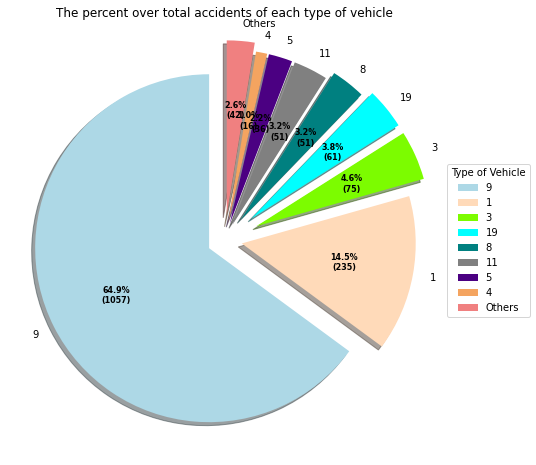

In [ ]:
TypeofVehicle = new_keys
NumberofAccident = new_values

# Creating explode data
explode = (0.1, 0.1, 0.2, 0.2, 0.15, 0.1, 0.1, 0.1, 0.15)
  
# Creating colorparameters
colors = ("lightblue","peachpuff", "lawngreen", "cyan", "teal",
          "grey", "indigo", "sandybrown", "lightcoral")
  
# Create a function that return the pct over over total accident of each type
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
# Create the plot
fig, ax = plt.subplots(figsize =(10, 8))
wedges, texts, autotexts = ax.pie(NumberofAccident, 
                                  autopct = lambda pct: func(pct, NumberofAccident),
                                  explode = explode, 
                                  labels = TypeofVehicle,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, TypeofVehicle,
          title ="Type of Vehicle",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("The percent over total accidents of each type of vehicle")
  
# Show plot
plt.show()

### BAR CHART

Ta vẽ thêm một biểu đồ cột nhằm trực quan hóa được số vụ tai nạn mà từng loại phương tiện gây ra

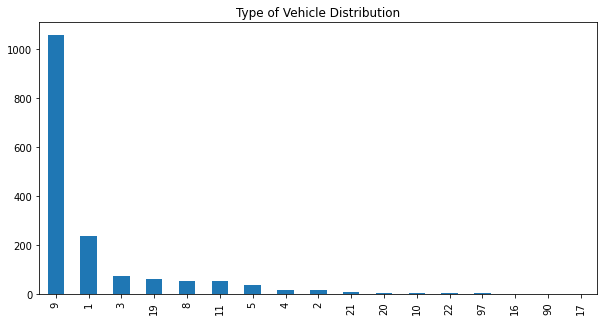

In [ ]:
df_drop['Type of Vehicle'].value_counts().plot(kind= 'bar', title = 'Type of Vehicle Distribution', figsize = (10, 5));

## THỐNG KÊ CÁC LOẠI XE GÂY TAI NẠN (%)

In [ ]:
df_drop['Type of Vehicle'].value_counts(1)*100

9     64.907975
1     14.478528
3      4.601227
19     3.803681
8      3.190184
11     3.190184
5      2.208589
4      1.042945
2      0.920245
21     0.490798
20     0.306748
10     0.184049
22     0.184049
97     0.184049
16     0.122699
90     0.122699
17     0.061350
Name: Type of Vehicle, dtype: float64

##**KẾT LUẬN**
- Loại xe số 9 gây tai nạn nhiều nhất(1057 vụ), **chiếm 65%** trên tổng số các vụ tai nạn.
- Xét về ảnh hưởng chung thì cả loại xe số 1 và số 9 **chiếm gần 80%**. Trong khi tổng tất cả các loại khác chỉ chiếm 20% 
- Ngược lại, từ biểu đồ cột ta có thể thấy có một số loại phương tiện rất ít khi xảy ra tai nạn như: 16, 90, 17. Những loại này hầu như không xảy ra tai nạn<br>
Note: 
- Loại 1: Pedal cycle
- Loại 9: Car

# **ẢNH HƯỞNG CỦA BỀ MẶT ĐƯỜNG, ĐIỀU KIỆN THỜI TIẾT, ĐIỀU KIỆN ÁNH SÁNG (Bình)**

## SỐ LƯỢNG TAI NẠN THEO TÌNH TRẠNG BỀ MẶT ĐƯỜNG

Dry      1359
Wet       521
Frost      17
Flood       5
Snow        3
Name: Road Surface, dtype: int64

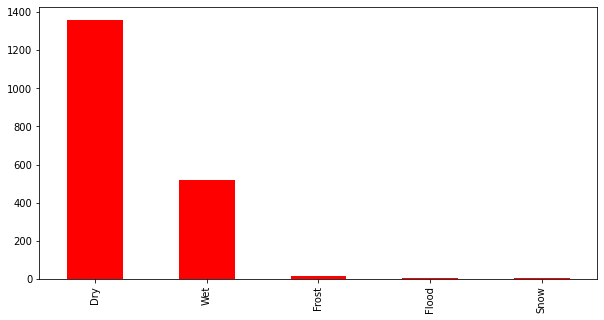

In [ ]:
road_surface = df['Road Surface'].map({1: 'Dry', 2: 'Wet', 3: 'Snow', 4: 'Frost', 5: 'Flood'}).value_counts()

road_surface.plot(kind='bar', figsize = (10, 5), color='r')
road_surface

## SỐ LƯỢNG TAI NẠN THEO ĐIỀU KIỆN ÁNH SÁNG

1    1389
4     436
6      43
7      30
5       9
Name: Lighting Conditions, dtype: int64

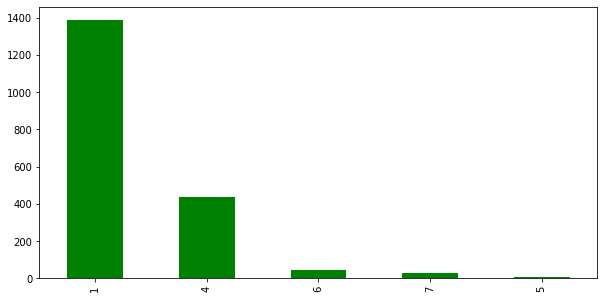

In [ ]:
lighting_conditions = df['Lighting Conditions'].value_counts()

lighting_conditions.plot(kind='bar', figsize = (10, 5), color='g')
lighting_conditions


## SỐ LƯỢNG TAI NẠN THEO ĐIỀU KIỆN THỜI TIẾT

1    1633
2     215
5      25
4      19
8       8
3       3
9       2
7       1
6       1
Name: Weather Conditions, dtype: int64

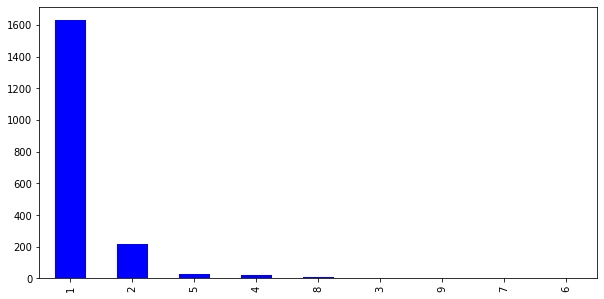

In [ ]:
weather_conditions = df['Weather Conditions'].value_counts()

weather_conditions.plot(kind='bar', figsize = (10, 5), color='b')
weather_conditions

## PHÂN TÍCH TẦM ẢNH HƯỞNG

In [ ]:
# Điều kiện thời tiết: Raining without high winds
weather = 2

print("Tổng số vụ tai nạn do mưa:")
len(df[df['Weather Conditions'] == weather])

Tổng số vụ tai nạn do mưa:


215

In [ ]:
# Bề mặt đường: Wet (2)
surface = 2

print("Tổng số vụ tai nạn trong điều kiện đường ướt:")
len(df[df['Road Surface'] == surface])

Tổng số vụ tai nạn trong điều kiện đường ướt:


521

### Ban ngày, đường ướt, điều kiện ánh sáng đầy đủ, số vụ tai nạn theo thời tiết là:

In [ ]:
# Bề mặt đường: Wet (2)
# Điều kiện ánh sáng: Daylight: street lights present (1)
surface = 2
lighting = 1

weather = df[df['Road Surface'] == surface][df['Lighting Conditions'] == lighting]
weather['Weather Conditions'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1    134
2    119
5     14
4      9
8      2
Name: Weather Conditions, dtype: int64

### Ban đêm, đường ướt, điều kiện ánh sáng đầy đủ, số vụ tai nạn theo thời tiết là:

In [ ]:
# Bề mặt đường: Wet (2)
# Điều kiện ánh sáng: Darkness: street lights present and lit (4)
surface = 2
lighting = 4

weather = df[df['Road Surface'] == surface][df['Lighting Conditions'] == lighting]
weather['Weather Conditions'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1    119
2     79
5      9
3      2
8      1
6      1
4      1
Name: Weather Conditions, dtype: int64

**NHẬN XÉT**
- Có 215 vụ tai nạn do **mưa**.
- Trong 215 vụ đó, có 198 vụ (119 ban ngày, 79 ban đêm) xảy ra trong tình trạng **đường ướt** và điều kiện ánh sáng **đầy đủ**, chiếm **92%**.



###**KẾT LUẬN**
- **Điều kiện ánh sáng** không ảnh hưởng đến các vụ tai nạn.
- **Đường ướt** và **mưa** khiến cho mặt đường trơn, là một trong những nguyên nhân chính dẫn đến các vụ tai nạn.
- Nếu tai nạn xảy ra trong lúc **bề mặt đường** đang ướt, có đến **40%** khả năng nguyên nhân là ảnh hưởng thêm của **mưa**.
- Tai nạn trong lúc **đường ướt** và **mưa** chiếm **10%** trên tổng số vụ tai nạn của năm 2019 tại Leeds.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be

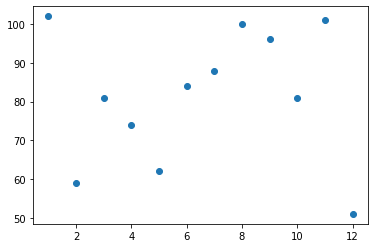

In [ ]:
df["day"] = df["Accident Date"].apply(lambda x: x[0:2])
df["day"] = pd.to_numeric(df["day"])
df["month"] = df["Accident Date"].apply(lambda x: x[3:5])
df["month"] = pd.to_numeric(df["month"])
count1 = []
count2 = []

for i in range(1, 13):
  c1 = df[df['month'] == i][df['day'] >= 1][df['day'] <= 15].shape[0]
  c2 = df[df['month'] == i][df['day'] >= 16][df['day'] <= 31].shape[0]
  count1.append(c1)
  count2.append(c2)

#print(count1)
#print(count2)
month = [i for i in range(1, 13)]
plt.scatter(month, count2)
# count = list(df['month'].value_counts())
# month = [11, 3, 7, 9, 10, 8 , 1, 2, 4, 6, 12, 5]
# plt.scatter(month, count)

# **PHÂN TÍCH XU HƯỚNG, CHU KÌ CỦA SỐ LƯỢNG TAI NẠN (Điệp)**

Đầu tiên ta lại import thư mục cần thiết và đọc file vào vào biến df19

In [ ]:
import datetime as dt
df19 = pd.read_csv('https://datamillnorth.org/download/road-traffic-accidents/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv')

Tiếp theo là viết một số hàm để xử lý dữ liệu

In [ ]:
# Tạo dictionary gồm ngày và số vụ tai nạn từ đữ liệu ban đầu
def unique_date_freq(alist):
  tmp_dict = {}
  for i in alist:
    if(not(i in tmp_dict.keys())):
      tmp_dict[i] = 1
    else:
      tmp_dict[i] = tmp_dict[i] + 1
  return tmp_dict
  
# Hàm dưới để chuyển một list(cột trong DataFrame) từ str sang Date
def strToDate(alist):
  tmp = []
  for date in alist:
    tmp.append(dt.datetime.strptime(date,"%d/%m/%Y"))
  return tmp

# Cuối cùng là viết hàm sắp xếp theo Date như bên dưới
def sortOnDate(df, dateCol, freqCol):
  data_len = len(df['Date'])
  for i in range(data_len):
    for j in range(i+1,data_len):
      if(df[dateCol][i]>df[dateCol][j]):
        df[dateCol][i], df[dateCol][j] = df[dateCol][j], df[dateCol][i]
        df[freqCol][i], df[freqCol][j] = df[freqCol][j], df[freqCol][i]
  return df[dateCol],df[freqCol]

In [ ]:
# Lấy những vụ tai nạn theo ngày bằng cách bỏ đi những dòng trùng trên 2 trường ngày và Ref Number
date19 = df19.drop_duplicates(['Reference Number','Accident Date'])['Accident Date']
# Sau khi lấy những ngày unique thì index vẫn chưa hợp lệ, nên thực hiện reset
date19.reset_index(drop = True, inplace = True)

# Tiếp đến ta tạo ra DataFrame có chứa các ngày unique và số vụ tai nạn tương ứng
dict19 = unique_date_freq(date19)
data19 = pd.DataFrame({'Date':dict19.keys(), 'Number of Accident':dict19.values()})

# Chuyển định dạng cột Date sang từ string sang date
data19['Date'] = strToDate(data19['Date'])

# Sắp xếp DataFrame theo ngày
sortOnDate(data19,'Date','Number of Accident');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Hiển thị xem data hiện tại như thế nào

In [ ]:
data19

,Date,Number of Accident
0,2019-01-01,3
1,2019-01-02,2
2,2019-01-03,3
3,2019-01-04,2
4,2019-01-07,5
...,...,...
343,2019-12-24,4
344,2019-12-27,1
345,2019-12-29,2
346,2019-12-30,2


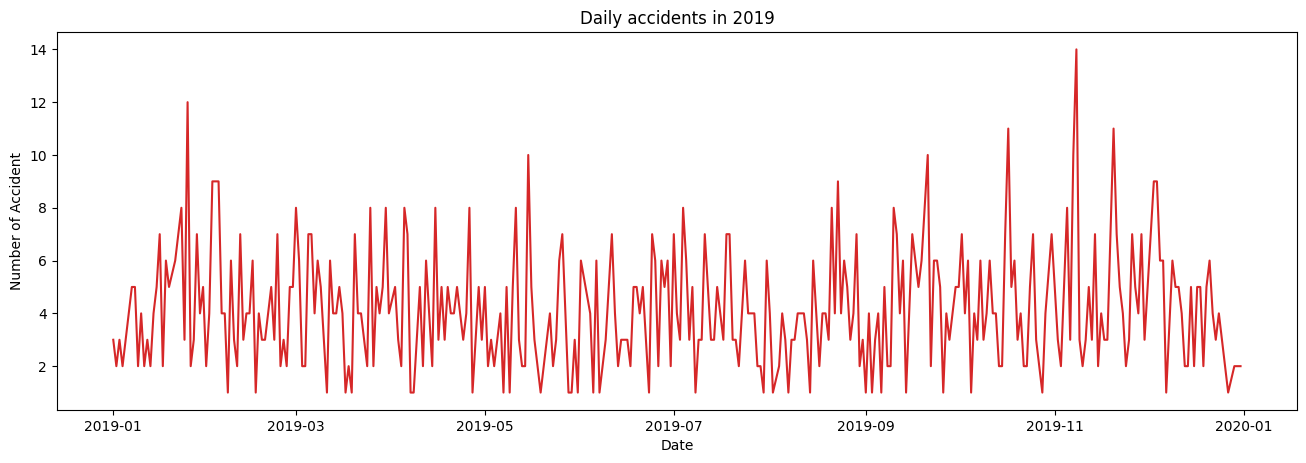

In [ ]:
# Vẽ biểu đồ, visualize dữ liệu
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Accident', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data19, x=data19.Date, y=data19['Number of Accident'], title='Daily accidents in 2019')   

In [ ]:
# Set cột Date thành index để có thể Decompose dữ liệu như bên dưới
dt19 = data19.set_index('Date')

Bên dưới, sau khi phân tích bằng 2 cách. Sau khi xem xét, ta sử dụng Multiplicative Decompose

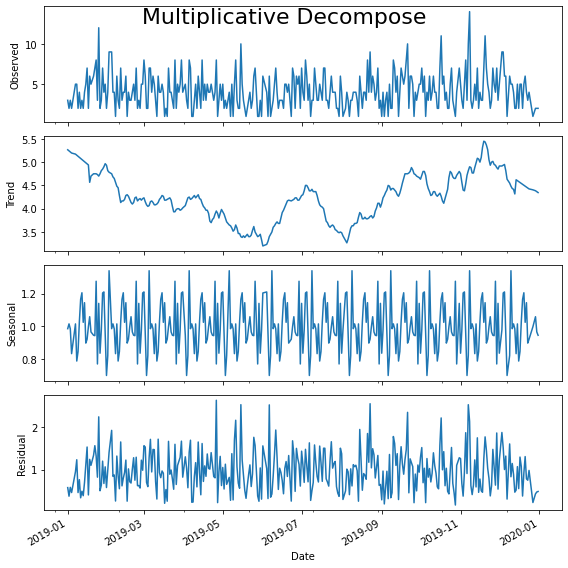

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_mul = seasonal_decompose(dt19['Number of Accident'], model='multiplicative', extrapolate_trend= 'freq',freq =30)

# Additive Decomposition
result_add = seasonal_decompose(dt19['Number of Accident'], model='additive', extrapolate_trend='freq',freq =30)

# Plot
plt.rcParams.update({'figure.figsize': (8,8)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
#result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show();

### TỔNG KẾT
- Theo biểu đồ Trend, ta thấy các vụ tai nạn xảy ra nhiều hơn vào lúc đầu năm và cuối năm vì đây là khoảng thời gian có ngày lễ lớn nhất Noel và năm mới. Và khoảng giữa năm, là kì nghỉ nên có ít tai nạn hơn
- Tuơng tự với biểu đồ của Seasonal, ta dễ dàng thấy rằng dữ liệu lặp đi lặp lại theo chu kì gần 1 tháng(4 tuần và trong đó có các chu kì nhỏ (là các tuần)). Có thể  các vụ tai nạn đột ngột tăng trong các season này liên quan tới việc nhận luơng